In [66]:
import pygame, pygame.sndarray
import numpy as np
import matplotlib.pyplot as plt
import chapter_13
import math
%load_ext autoreload
%autoreload 2

pygame.mixer.init(frequency=44100, size=-16, channels=1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def plot_sequence(points,max=100,line=False,**kwargs):
    if line:
        plt.plot(range(0,max),points[0:max],**kwargs)
    else:
        plt.scatter(range(0,max),points[0:max],**kwargs)

In [68]:
numbers = np.random.randint(-32768, 32767, size=44100)
numbers

array([ 22265,  23384, -14081, ...,  15745,   2987,   2931])

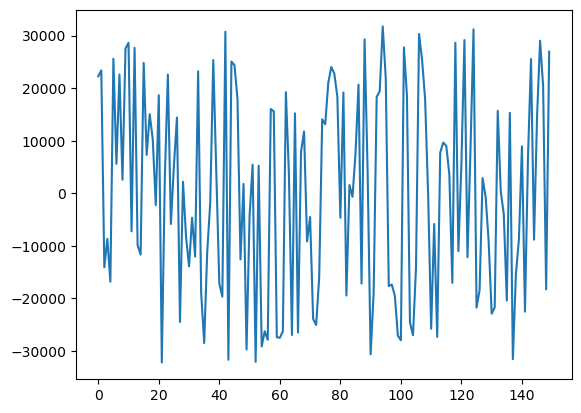

In [69]:
plot_sequence(numbers, max=150, line=True)

In [70]:
sound = pygame.mixer.Sound(numbers)
# sound.play()

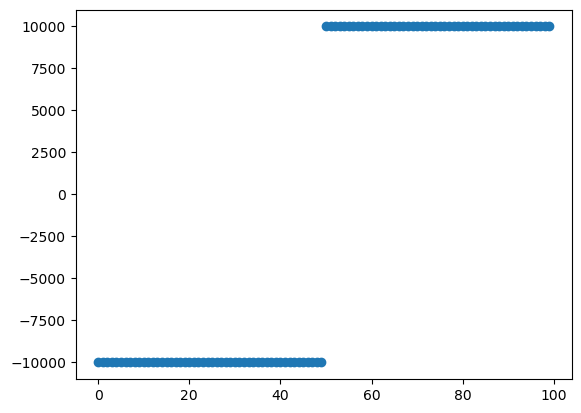

In [71]:
form = np.repeat([-10000, 10000], 50)
plot_sequence(form)

In [72]:
# pygame.mixer.Sound(np.tile(form, 10)).play()

Exercise 13.1: Our musical note A was a pattern that repeated 441 times in one second. Create a similar pattern that repeats 350 times in one second, which produces the musical note F.

In [73]:
f_note = np.repeat([-10000, 10000], 63)
# pygame.mixer.Sound(np.tile(f_note, 35)).play()


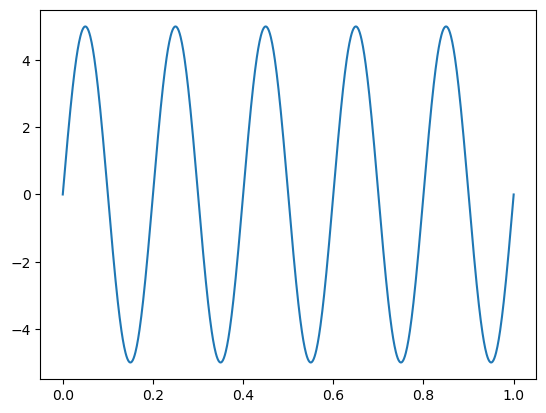

In [74]:
plot_function(chapter_13.make_sinusoid(5, 5), 0, 1)

In [75]:
sinusoid = chapter_13.make_sinusoid(441,8000)

In [76]:
np.arange(0, 1, 0.2)

array([0. , 0.2, 0.4, 0.6, 0.8])

In [77]:
seq = np.arange(0,1,1/44100)

In [78]:
arr = np.vectorize(sinusoid)(seq)
arr

array([   0.        ,  400.67179552,  334.77730486, ...,  120.95197221,
       -334.77730486, -400.67179552])

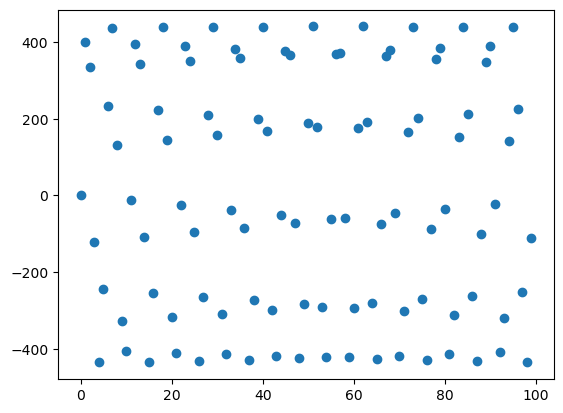

In [79]:
plot_sequence(list(map(sinusoid, seq)))

In [80]:
sample = chapter_13.sample(sinusoid, 0, 1, 44100)
pygame.mixer.Sound(sample).play()

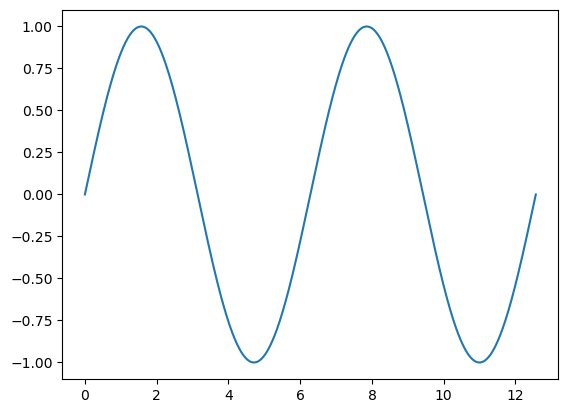

In [81]:
plot_function(math.sin, 0, 4 * math.pi)

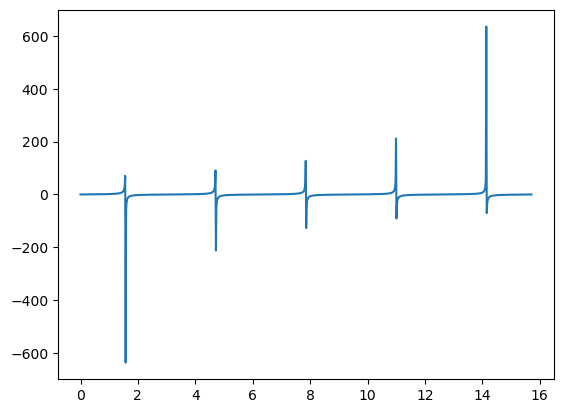

In [82]:
plot_function(math.tan, 0, 5 * math.pi)
#plt.ylim(-10, 10)

In [83]:
sample1 = chapter_13.sample(chapter_13.make_sinusoid(441,8000),0,1,44100)
sample2 = chapter_13.sample(chapter_13.make_sinusoid(551,8000),0,1,44100)
sound1 = pygame.sndarray.make_sound(sample1)
sound2 = pygame.sndarray.make_sound(sample2)
sound1.play()
sound2.play()

In [84]:
chord = pygame.sndarray.make_sound(sample1 + sample2)
chord.play()

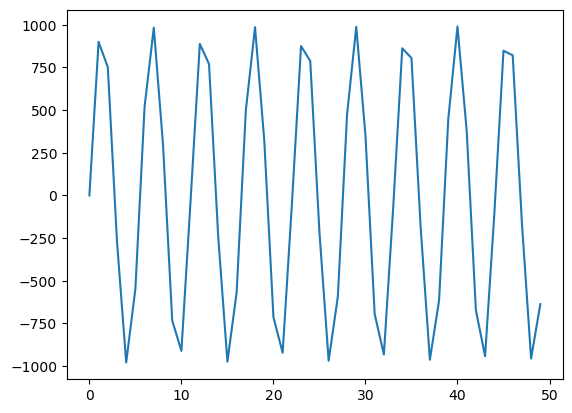

In [88]:
plot_sequence(sample1 + sample2, line=True, max=50)

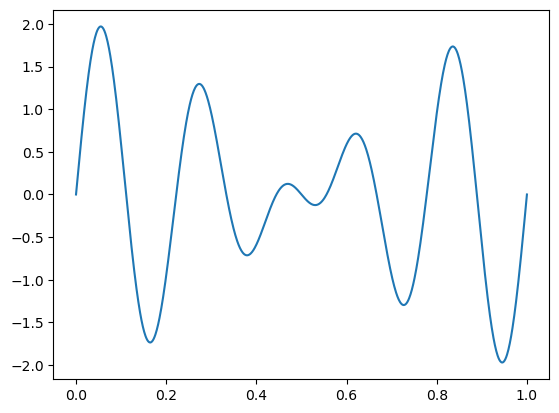

In [86]:
f = chapter_13.fourier_series(0,[],[0,0,0,1,1])
plot_function(f,0,1)

In [89]:
chapter_13.inner_product(chapter_13.s(1), chapter_13.c(1))

4.2197487366314734e-17

In [91]:
chapter_13.inner_product(chapter_13.s(1), chapter_13.s(2))

-5.600719490099363e-17